# Tensorflow Basics

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Converting an Image to greyscale

Here the image is converted to greyscale using the formula: <br>
<ul> grey image = 0.3 * red channel + 0.59 * green channel + 0.11 * blue channel </ul>

'Original Image: (1080, 1920, 3). Greyscale Image: (1080, 1920)'

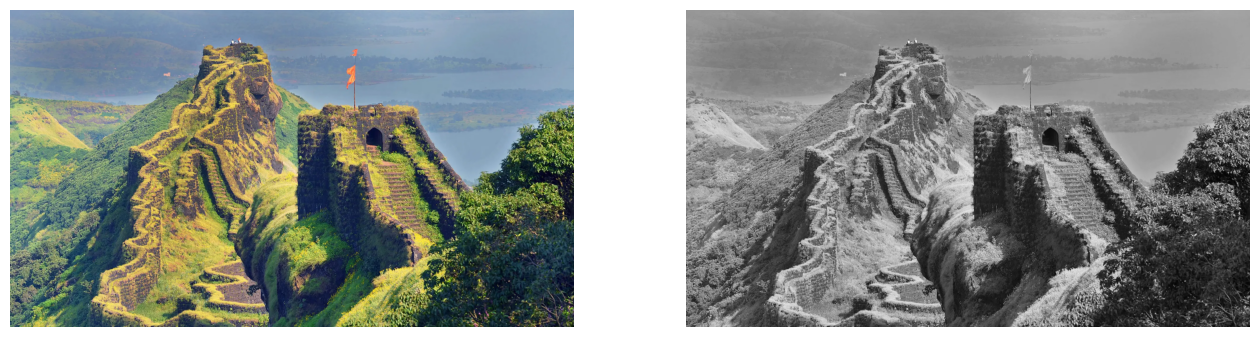

In [2]:
img = cv2.cvtColor(cv2.imread(r"data\imgs\Fort.png", cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

img_grey = 0.3*r + 0.59*g + 0.11*b

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_grey, cmap='gray', vmin=0, vmax=255)
plt.axis("off")

f"Original Image: {img.shape}. Greyscale Image: {img_grey.shape}"

## 2. Convolution Operation

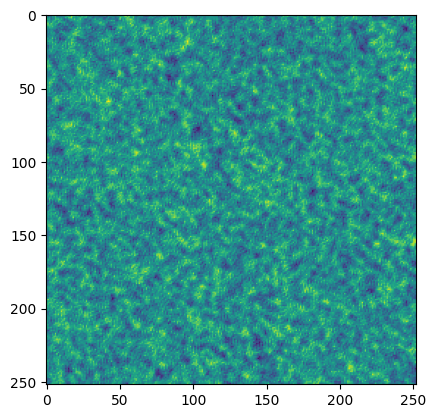

In [3]:
img = tf.convert_to_tensor(np.random.randint(0, 255, (256, 256)))
conv_f = tf.convert_to_tensor(np.random.randint(0, 10, (5, 5)))
img.shape, conv_f.shape

img = tf.reshape(img, (1, *img.shape, 1))
filter = tf.reshape( conv_f, (*conv_f.shape, 1, 1) )

img_conv = tf.nn.convolution(img, filter)
img.shape, filter.shape, img_conv.shape

plt.imshow(tf.squeeze(img_conv).numpy())

### Edge detection using Convolution

In [4]:
img = tf.convert_to_tensor(cv2.imread(r"data\imgs\Fort.png", cv2.IMREAD_GRAYSCALE ), dtype=tf.float32)
scharr_filter = tf.convert_to_tensor(np.array([ 
    [3, 10, -3],
    [0, 0, 0],
    [-3, -10, 3],
]), dtype=tf.float32)

img.shape, scharr_filter.shape

(TensorShape([1080, 1920]), TensorShape([3, 3]))

Reshaping image to the format (batch_size, height, width, channel) <br>
Redshaping image to format (height, width, incomming_channels, outgoing_channels)

In [5]:
img = tf.reshape(img, (1, *img.shape, 1))
scharr_filter = tf.reshape(scharr_filter, (*scharr_filter.shape, 1, 1))

img.shape, scharr_filter.shape

(TensorShape([1, 1080, 1920, 1]), TensorShape([3, 3, 1, 1]))

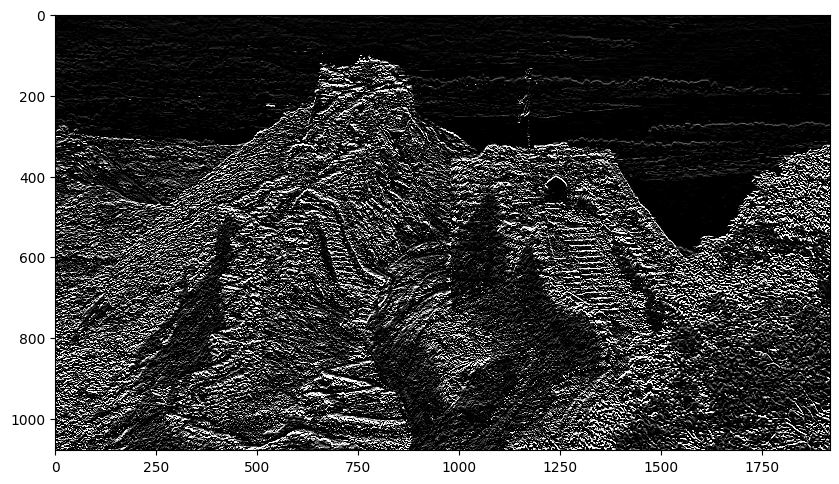

In [6]:
img_conv = tf.nn.convolution(img, scharr_filter)
plt.figure(figsize=(10, 6))
plt.imshow(tf.squeeze(img_conv).numpy(), cmap='gray', vmin=0, vmax=255)

## 3. Pooling operation

In [12]:
img_conv.numpy().shape

(1, 1078, 1918, 1)

'Image: (1, 1078, 1918, 1), Valid padded: (1, 538, 958, 1), Same Padded: (1, 539, 959, 1)'

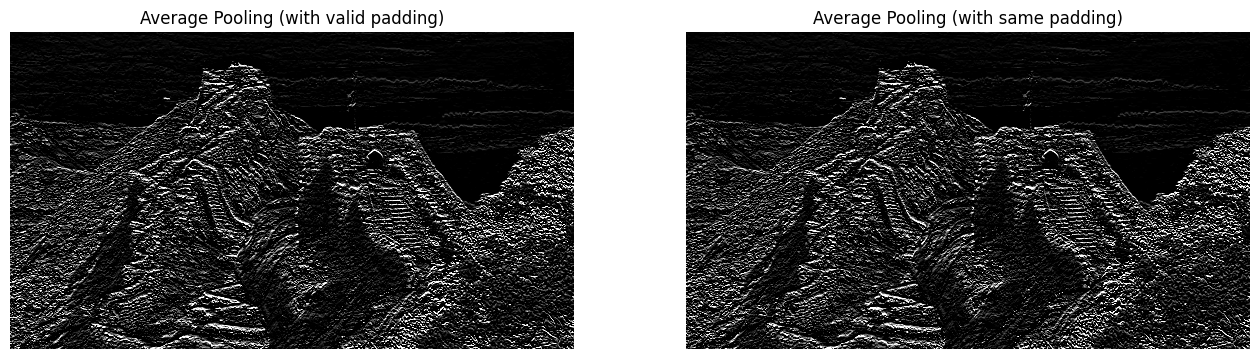

In [16]:
img_avg_valid = tf.nn.avg_pool2d(img_conv.numpy(), (1, 3,3, 1), strides=(1, 2, 2, 1), padding='VALID')
img_avg_same = tf.nn.avg_pool2d(img_conv.numpy(), (1, 3,3, 1), strides=(1, 2, 2, 1), padding='SAME')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(img_avg_valid, img_avg_valid.shape[1:-1]), cmap='gray', vmin=0, vmax=255)
plt.title('Average Pooling (with valid padding)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(img_avg_same, img_avg_same.shape[1:-1]), cmap='gray', vmin=0, vmax=255)
plt.title('Average Pooling (with same padding)')
plt.axis("off")

f"Image: {img_conv.shape}, Valid padded: {img_avg_valid.shape}, Same Padded: {img_avg_same.shape}"

'Image: (1, 1078, 1918, 1), Valid padded: (1, 539, 959, 1), Same Padded: (1, 539, 959, 1)'

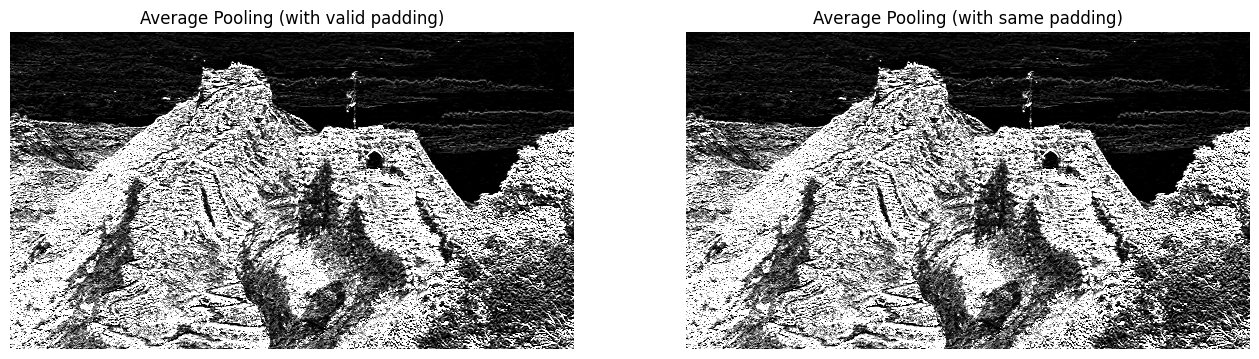

In [18]:
img_avg_valid = tf.nn.max_pool2d(img_conv.numpy(), (1, 2,2, 1), strides=(1, 2, 2, 1), padding='VALID')
img_avg_same = tf.nn.max_pool2d(img_conv.numpy(), (1, 2,2, 1), strides=(1, 2, 2, 1), padding='SAME')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(np.reshape(img_avg_valid, img_avg_valid.shape[1:-1]), cmap='gray', vmin=0, vmax=255)
plt.title('Average Pooling (with valid padding)')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(img_avg_same, img_avg_same.shape[1:-1]), cmap='gray', vmin=0, vmax=255)
plt.title('Average Pooling (with same padding)')
plt.axis("off")

f"Image: {img_conv.shape}, Valid padded: {img_avg_valid.shape}, Same Padded: {img_avg_same.shape}"